In [3]:
%pwd

'c:\\Users\\KentoSuemitsu\\Desktop\\study\\mne'

In [4]:
import mne
import numpy as np
import matplotlib.pyplot as plt

from telnetlib import NOP
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_hastie_10_2
import pickle


In [5]:
mat = scipy.io.loadmat('../datasets/Large_EEG_motor_imagery/raw_data/5F-SubjectB-151110-5St-SGLHand.mat')

mat = scipy.io.loadmat('../datasets/Large_EEG_motor_imagery/raw_data/CLASubjectF1509163StLRHand.mat')


marker = np.array(mat['o']['marker'][0][0])
data = np.array(mat['o']['data'][0][0])

info = mne.create_info(
    ch_names=['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'A1', 'A2',
    'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz','X3','MAR'],
    ch_types=['eeg', 'eeg','eeg', 'eeg','eeg', 'eeg','eeg', 'eeg','eeg', 'eeg','eeg', 'eeg',
    'eeg', 'eeg','eeg', 'eeg','eeg', 'eeg','eeg', 'eeg','eeg','eeg','eeg'],
    sfreq=200
)
print(data.shape)
data = np.append(data, marker, axis=1)
data = np.transpose(data, (1,0))

custom_raw = mne.io.RawArray(data, info)
print(custom_raw)

(666400, 22)
Creating RawArray with float64 data, n_channels=23, n_times=666400
    Range : 0 ... 666399 =      0.000 ...  3331.995 secs
Ready.
<RawArray | 23 x 666400 (3332.0 s), ~117.0 MB, data loaded>


In [15]:
events = mne.find_events(custom_raw, stim_channel='MAR')
event_dict = {'left_hand': 1, 'right_hand': 2, 'paccive': 3,
				'left_leg':4, 'tongue':5, 'right_leg':6,
				'first_relax':99, 'rest_session':91, 'finish_experience':92}

963 events found
Event IDs: [ 1  2  3  4  5  6 91 92 99]


In [16]:
reject_criteria = None#dict(eeg=150e-6)

In [17]:
epochs = mne.Epochs(custom_raw, events, event_id=event_dict, tmin=-0.2, tmax=1.0,
                    reject=reject_criteria, preload=True)

Not setting metadata
Not setting metadata
963 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 963 events and 241 original time points ...
0 bad epochs dropped


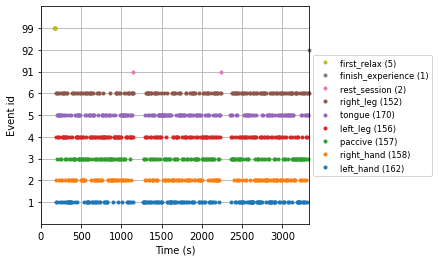

In [18]:
fig = mne.viz.plot_events(events, sfreq=custom_raw.info['sfreq'],
                          first_samp=custom_raw.first_samp, event_id=event_dict)
fig.subplots_adjust(right=0.7)  

In [33]:
conds_we_care_about = ['left_hand', 'right_hand', 'paccive',
				'left_leg', 'tongue', 'right_leg']
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place
left_hand_epochs=epochs['left_hand']
right_hand_epochs=epochs['right_hand']

Dropped 0 epochs: 


Not setting metadata
Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\KentoSuemitsu\AppData\Local\Temp\ipykernel_15804\2708081240.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  left_hand_epochs.plot_image(picks=['C3', 'C4','Cz'])
C:\Users\KentoSuemitsu\AppData\Local\Temp\ipykernel_15804\2708081240.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  left_hand_epochs.plot_image(picks=['C3', 'C4','Cz'])
C:\Users\KentoSuemitsu\AppData\Local\Temp\ipykernel_15804\2708081240.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  left_hand_epochs.plot_image(picks=['C3', 'C4','Cz'])


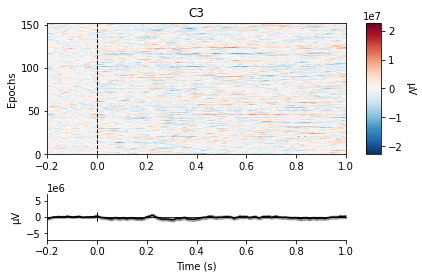

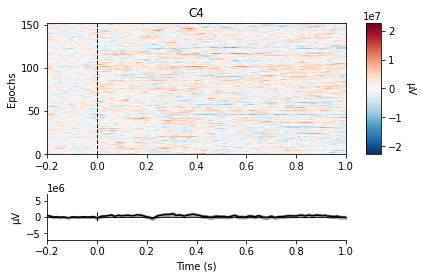

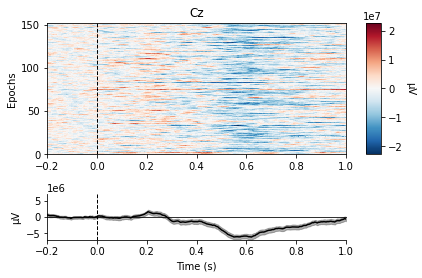

Not setting metadata
Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\KentoSuemitsu\AppData\Local\Temp\ipykernel_15804\2708081240.py:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  right_hand_epochs.plot_image(picks=['C3', 'C4','Cz'])
C:\Users\KentoSuemitsu\AppData\Local\Temp\ipykernel_15804\2708081240.py:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  right_hand_epochs.plot_image(picks=['C3', 'C4','Cz'])
C:\Users\KentoSuemitsu\AppData\Local\Temp\ipykernel_15804\2708081240.py:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  right_hand_epochs.plot_image(picks=['C3', 'C4','Cz'])


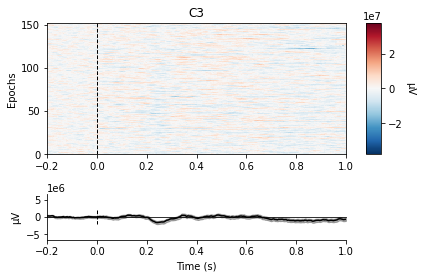

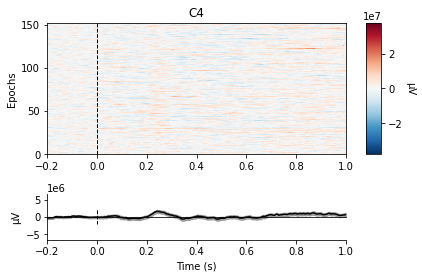

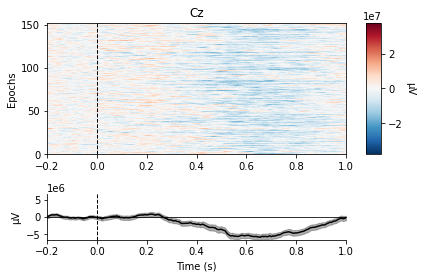

[<Figure size 432x288 with 3 Axes>,
 <Figure size 432x288 with 3 Axes>,
 <Figure size 432x288 with 3 Axes>]

In [34]:
left_hand_epochs.plot_image(picks=['C3', 'C4','Cz'])
right_hand_epochs.plot_image(picks=['C3', 'C4','Cz'])

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


C:\Users\KentoSuemitsu\AppData\Local\Temp\ipykernel_15804\3523641271.py:10: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(dict(left_hand=left_hand_evoked, right_hand=right_hand_evoked,


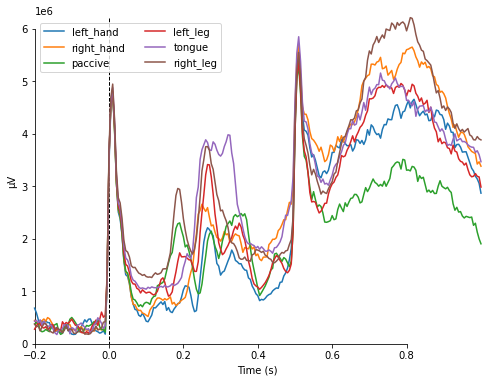

[<Figure size 576x432 with 1 Axes>]

In [36]:

left_hand_evoked = left_epochs.average()
right_hand_evoked = right_epochs.average()
paccive_evoked=epochs['paccive'].average()
left_leg_evoked=epochs['left_leg'].average()
tongue_evoked=epochs['tongue'].average()
right_leg_evoked=epochs['right_leg'].average()



mne.viz.plot_compare_evokeds(dict(left_hand=left_hand_evoked, right_hand=right_hand_evoked,
paccive=paccive_evoked, left_leg=left_leg_evoked,tongue=tongue_evoked, right_leg=right_leg_evoked),
                             legend='upper left', show_sensors='upper right')

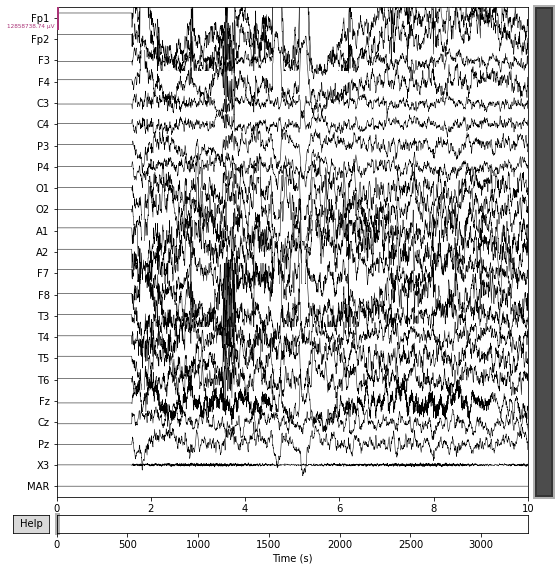

In [57]:
scalings = 'auto'
custom_raw.plot(n_channels=23, 
                scalings=scalings,
                title='Data from arrays',
         show=True, block=True)

plt.show()